In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Tarea 1: Crear una imagen con la textura de un tablero de ajedrez
Lo primero será darle dimensiones a la imagen para la primera tarea: dibujar un tablero de ajedrez de 800x800.

In [2]:
#Dimensiones de la imagen a crear según la tarea
ancho = 800
largo = 800

Se le dará color a la imagen, resultando un fondo negro.

In [ ]:
black_img = np.zeros((largo, ancho, 1), dtype=np.uint8)
print(black_img.shape)

(800, 800, 1)


Se muestra la imagen con imshow. Lo que se hace es ir saltando en cuadrados de 100 x 100. Se suma la parte entera de cada columna y fila del bloque. Si es par, se pinta de blanco. Si no, de negro. De esta forma, los colores se van alternando para que parezca un tablero de ajedrez como se ha solicitado.

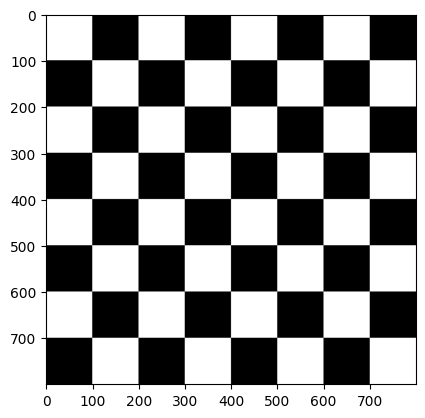

In [3]:
black_img = np.zeros((largo, ancho), dtype=np.uint8)
for x in range(0, ancho, 100):
    for y in range(0, largo, 100):
        if (x//100 + y//100) % 2 == 0:
            black_img[y:y+100, x:x+100] = 255

plt.imshow(black_img, cmap='gray')
plt.show()

### Tarea 2: Crear una imagen estilo Mondrian 

Como segunda tarea se debe de crear una imagen con estilo Mondrian. Para ello, se vuelve a usar el fondo negro al que se le irá añadiendo los diferentes cuadros que forman este tipo de arte.

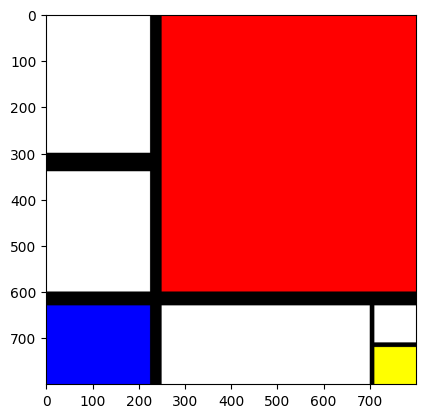

In [5]:
black_img = np.zeros((alto, ancho, 3), dtype=np.uint8)

# Rojo
black_img[0:600,250:ancho, 0] = 255 #tercer índice especifica un canal (0-2)

# Blanco esquina izquierda superior
black_img[0:300, 0:225, 0] = 255
black_img[0:300, 0:225, 1] = 255
black_img[0:300, 0:225, 2] = 255

# Blanco lateral izquierdo
black_img[340:600, 0:225, 0] = 255
black_img[340:600, 0:225, 1] = 255
black_img[340:600, 0:225, 2] = 255

# Azul abajo a la izquierda
black_img[630:800, 0:225, 2] = 255

# Blanco abajo

black_img[630:800, 250:700, 0] = 255
black_img[630:800, 250:700, 1] = 255
black_img[630:800, 250:700, 2] = 255

# Blanco abajo a la derecha
black_img[630:710, 710:800, 0] = 255
black_img[630:710, 710:800, 1] = 255
black_img[630:710, 710:800, 2] = 255

# Amarillo abajo a la derecha
black_img[720:800, 710:800, 0] = 255
black_img[720:800, 710:800, 1] = 255
black_img[720:800, 710:800, 2] = 0


plt.imshow(black_img)
plt.show()

### Tarea 3: Hacer uso de las funciones de dibujo de OpenCV
Creamos una imagen base para poder ver dibujar sobre ella

In [11]:
size = 500
base = np.zeros((size, size, 3), dtype = np.uint8)

Usamos las funciones de dibujo para crear distintas figuras en la imagen

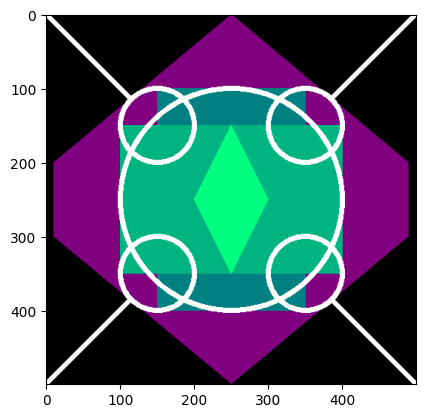

In [41]:
base = np.zeros((size, size, 3), dtype = np.uint8)
# Línea diagonal de la esquina inferior izquierda a la superior derecha
cv2.line(base, (0, size-1), (size-1, 0), (255, 255, 255), 5)
# Linea diagonal de la esquina superior izquierda a la inferior derecha
cv2.line(base, (0, 0), (size-1, size-1), (255, 255, 255), 5)
# Polígono
pts = np.array([[250, 0], [10, 200], [10, 300], [250, 499], [489, 300], [489, 200]], dtype=np.int32)  # Creamos el array de puntos
pts = pts.reshape((-1, 1, 2))   # Convertimos el array al formato (nº vertices x 1 x 2)
cv2.fillPoly(base, [pts], (128, 0, 128))
# Rectángulo vertical
cv2.rectangle(base, (150, 100), (350, 400), (0, 128, 128), -1)
# Rectángulo horizontal
cv2.rectangle(base, (100, 150), (400, 350), (0, 180, 128), -1)
# Círculos
cv2.circle(base, (250, 250), 150, (255, 255, 255), 5)
cv2.circle(base, (150, 150), 50, (255, 255, 255), 5)
cv2.circle(base, (350, 150), 50, (255, 255, 255), 5)
cv2.circle(base, (350, 350), 50, (255, 255, 255), 5)
cv2.circle(base, (150, 350), 50, (255, 255, 255), 5)

pts = np.array([[250, 150], [200, 250], [250, 350], [300, 250]], dtype=np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.fillPoly(base, [pts], (0, 255, 128))

# Mostramos la imagen
plt.imshow(base)
plt.show()

### Tarea 4: Modificar un plano de la imagen
Capturamos la imagen de la webcam, separamos los planos de la imagen y modificamos uno de ellos

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    ret, frame = vid.read()

    if ret:
        # Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        # Dimensiones imagen de entrada
        h, w, c = frame.shape

        # Modificamos uno de los planos
        g = 255 - g     # Invertimos el valor
        ruido = np.random.randint(0, 50, g.shape, dtype=np.uint8)
        g = cv2.add(g, ruido)   # Añadimos ruido
        g = cv2.GaussianBlur(g, (15, 15), 0)    # Añadimos desenfoque

        # Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

### Tarea 5: Destacar tanto el pixel con el color más claro como con el color más oscuro de una imagen

Se usará la cámara y así se obtienen las dimensiones de la imagen que capta esta. Por otro lado, se convierte la imagen de BGR a HSV (tono, saturación, brillo, respectivamente). Es este caso, los valores más importantes son los asociados a la v, el brillo. El círculo azul captura el punto más claro y el rojo, el píxel más oscuro. Para finalizar, se muestra la iamgen y se sale de la cámara pulsando la tecla ESC.

In [ ]:
vid = cv2.VideoCapture(0)

while(True):
    ret, frame = vid.read()

    if ret:
        frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(frameHSV)
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(v)
        # En azul tenemos el valor del pixel más claro
        cv2.circle(frame, maxLoc, 10, (255, 0, 0), 2)

        # En rojo tenemos el valor del pixel más oscuro
        cv2.circle(frame, minLoc, 10, (0, 0, 255), 2)


        cv2.imshow('Original', frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

### Tarea 6: Hacer una propuesta de pop art con la entrada de la cámara web o vídeo
Capturamos la imagen de la webcam y creamos un collage 3x3 para imitar el estilo Pop-art de Andy Warhol

In [6]:
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Imagen conjunta 2x original
collage = np.zeros((h*3,w*3,3), dtype = np.uint8)
# Primera fila
tl = collage[0:h,0:w]
tm = collage[0:h,w:w*2]
tr = collage[0:h,w*2:w*3]
# Tercera fila
ml = collage[h:h*2,0:w]
mm = collage[h:h*2,w:w*2]
mr = collage[h:h*2,w*2:w*3]
# Tercera fila
bl = collage[h*2:h*3,0:w]
bm = collage[h*2:h*3,w:w*2]
br = collage[h*2:h*3,w*2:w*3]

while True:      
    ret, frameIN = vid.read()

    # Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        # Cambiamos los colores de los planos para el pop art

        # Primera fila
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tm[:,:,0] = 255 - b
        tm[:,:,1] = g
        tm[:,:,2] = r

        tr[:,:,0] = 255 - b
        tr[:,:,1] = 255 - g
        tr[:,:,2] = 255 - r
        
        # Segunda fila
        ml[:,:,0] = b
        ml[:,:,1] = r
        ml[:,:,2] = 255 - g

        mm[:,:,0] = 255 - b
        mm[:,:,1] = g
        mm[:,:,2] = 255 - r

        mr[:,:,0] = 255 - b
        mr[:,:,1] = 255 - r
        mr[:,:,2] = g

        # Tercera fila
        bl[:,:,0] = r
        bl[:,:,1] = b
        bl[:,:,2] = g

        bm[:,:,0] = b
        bm[:,:,1] = 255 - g
        bm[:,:,2] = 255 - r

        br[:,:,0] = b
        br[:,:,1] = r
        br[:,:,2] = g
    
        # Muestra composición
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
# Cerramos la captura y las ventanas
vid.release()
cv2.destroyAllWindows()